## Neural Network HW_18

## 1.What is a neural network? What are the general steps required to build a neural network? 

#### Neural network

* Neural Networks also known as Artificial Neural Network(ANN) is a subset of Machine Learning Algorithm and heart of deep learning Algorithms.

* Neural Networks reflect the behaviour of human brain, allowing computer programs to recognize patterns and solve problems.

#### General steps to build a neural network

* First step will be Specifying the architecture, like
     * how many **hidden layers** we are going to use?
     * how many **nodes** we are going to keep in each layer?
     * what **activation function** we are going to use in each layer?
     
* Method to generate weights(**specifying optimizer**) and use loss function to compare the deviation of actual and predicted values.

* **Training of neural networks** - which is that cycle of forward or backward propagation and optimization of model weights with our data.

* After we trained our network, we can **predict output** using test set.

## 2. Generally, how do you check the performance of a neural network? Why? 


* Every task in neural network has different outputs. For example, predicting an image as a cat or dog has an output of yes or no and predicting housing prices will have continuous variables. 

* The way we configure our loss functions can make or break the performance of our algorithm. By correctly configuring the loss function, we can make sure our model will work how we want it to.

* We can check our classification outcome performance using
     * Confusion Matrix
     * Classification report
     * Accuracy
     * precision score
     * Recall score

* We can check our regression outcome performance using
     * R2 score
     * MSE(Mean Squared Error)
     * MAE(Mean Absolute Error)
     * RMSE(Root Mean Squared Error)

## 3.Create a neural network using keras to predict the outcome for Abalone age

In [1]:
import pandas as pd
import numpy as np

In [2]:
column_list = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']
abalone_df = pd.read_csv('../Ensemble_learning_17/abalone.data', names = column_list)
abalone_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Preprocessing in abalone dataset

In [3]:
# checking for nulls
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

In [4]:
# Sex column is categorical. We have to convert it into numerical. We can use pandas dummy function to encode sex column
sex_encode = pd.get_dummies(abalone_df['Sex'])
sex_encode

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [5]:
abalone_df = pd.concat([abalone_df,sex_encode],axis = 1)

In [6]:
# we can drop categorical sex column 
abalone_df = abalone_df.drop('Sex',axis = 1)
abalone_df

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


#### Checking for outliers

* Easiest way of checking outliers is by plotting blot box for every feature. 

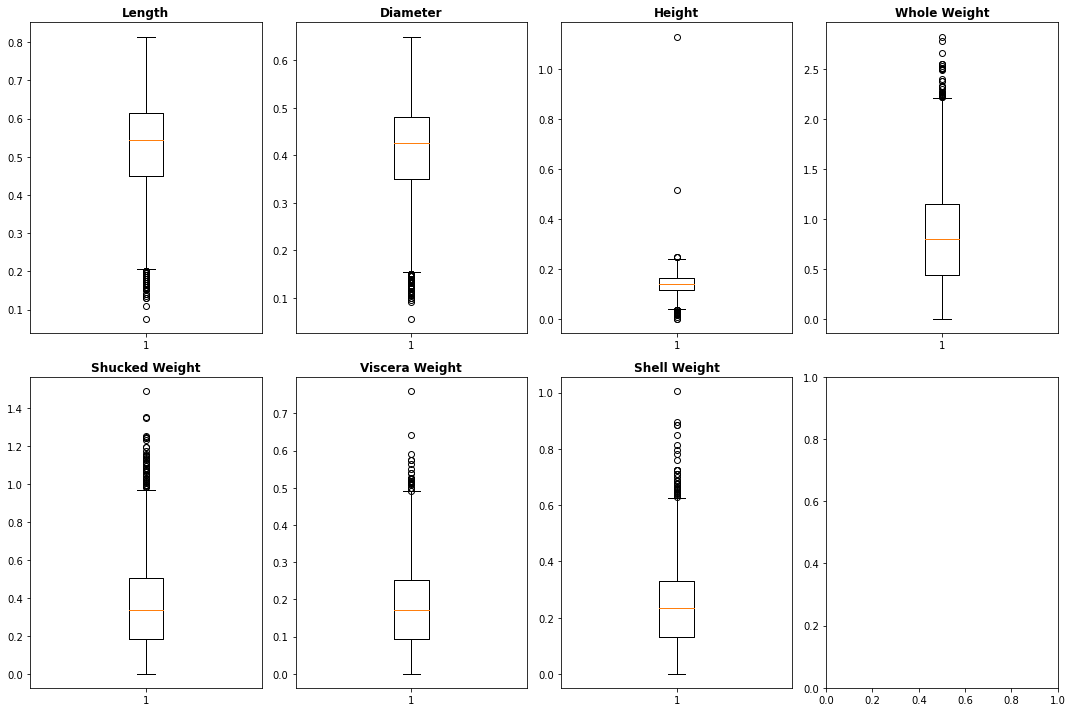

In [8]:
# importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,10)
fig,ax = plt.subplots(2,4) # 2 rows 4 columns

ax[0,0].boxplot(abalone_df['Length'])
ax[0,0].set_title("Length", weight='bold')
ax[0,1].boxplot(abalone_df['Diameter'])
ax[0,1].set_title("Diameter",weight='bold')
ax[0,2].boxplot(abalone_df['Height'])
ax[0,2].set_title("Height",weight='bold')
ax[0,3].boxplot(abalone_df['Whole Weight'])
ax[0,3].set_title("Whole Weight",weight='bold')
ax[1,0].boxplot(abalone_df['Shucked Weight'])
ax[1,0].set_title("Shucked Weight",weight='bold')
ax[1,1].boxplot(abalone_df['Viscera Weight'])
ax[1,1].set_title("Viscera Weight",weight='bold')
ax[1,2].boxplot(abalone_df['Shell Weight'])
ax[1,2].set_title("Shell Weight",weight='bold')
plt.tight_layout()
plt.show();

#### Detecting outliers using the Inter Quantile Range(IQR)

In [7]:
# All features has outliers. It might reduce our performance. Itereate through the values and replace outliers as Nans
for col, val in abalone_df.iteritems():
    Q1 = np.percentile(abalone_df[col],25)
    Q3 = np.percentile(abalone_df[col],75)
    # inner quartile range
    IQR = Q3 - Q1
    # Finding the outliers & replacing it with 0
    upper_bound = Q3 + (IQR*1.5)
    lower_bound = Q1 - (IQR*1.5)
    abalone_df[col] = np.where((abalone_df[col] > upper_bound) | (abalone_df[col] < lower_bound), 0, 
                                     abalone_df[col])


**After replaced outliers, checking my plots again**

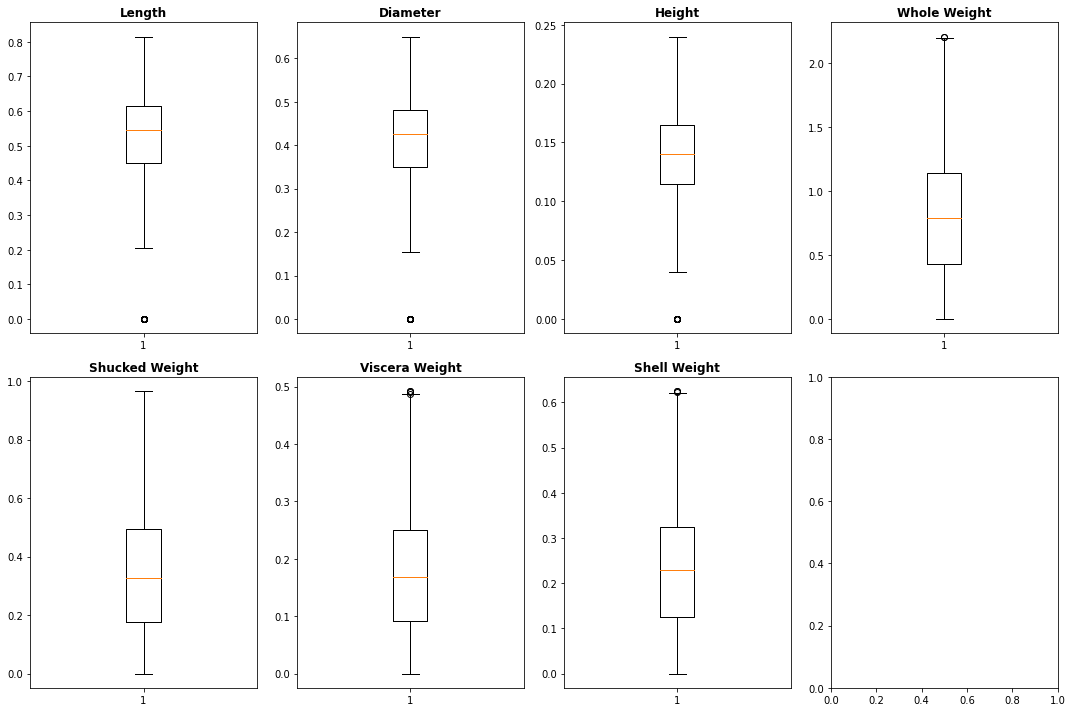

In [10]:
plt.rcParams["figure.figsize"] = (15,10)
fig,ax = plt.subplots(2,4) # 2 rows 4 columns

ax[0,0].boxplot(abalone_df['Length'])
ax[0,0].set_title("Length", weight='bold')
ax[0,1].boxplot(abalone_df['Diameter'])
ax[0,1].set_title("Diameter",weight='bold')
ax[0,2].boxplot(abalone_df['Height'])
ax[0,2].set_title("Height",weight='bold')
ax[0,3].boxplot(abalone_df['Whole Weight'])
ax[0,3].set_title("Whole Weight",weight='bold')
ax[1,0].boxplot(abalone_df['Shucked Weight'])
ax[1,0].set_title("Shucked Weight",weight='bold')
ax[1,1].boxplot(abalone_df['Viscera Weight'])
ax[1,1].set_title("Viscera Weight",weight='bold')
ax[1,2].boxplot(abalone_df['Shell Weight'])
ax[1,2].set_title("Shell Weight",weight='bold')
plt.tight_layout()
plt.show();

In [11]:
abalone_df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,F,I,M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.521998,0.406082,0.138801,0.811479,0.346594,0.177221,0.232791,8.783337,0.312904,0.321283,0.365813
std,0.127131,0.105257,0.039121,0.476553,0.209650,0.106658,0.133435,3.287797,0.463731,0.467025,0.481715
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.433500,0.177500,0.091000,0.125000,7.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.790500,0.328500,0.168500,0.229500,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.141500,0.494500,0.249500,0.323500,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,0.240000,2.210000,0.965500,0.492000,0.625000,15.000000,1.000000,1.000000,1.000000


In [8]:
# I am writing a function to check 0s in the columns. Keeping Columns which contains 0s in a list. 
zero_features = ['Length', 'Diameter', 'Height', 'Whole Weight','Shucked Weight','Viscera Weight']

def check_zeros(df,features):
    for i in features:
        print('%s : No. of 0s: %d' %(i,len(df.loc[df[i]==0,i])))
        
# calling zero_features function
check_zeros(abalone_df,zero_features)

Length : No. of 0s: 49
Diameter : No. of 0s: 59
Height : No. of 0s: 29
Whole Weight : No. of 0s: 30
Shucked Weight : No. of 0s: 48
Viscera Weight : No. of 0s: 26


In [9]:
def impute_zeros(df, features):
    nonzero_vals = df.loc[df[features] != 0, features]
    avg = np.sum(nonzero_vals) / len(nonzero_vals)
    k = len(df.loc[ df[features] == 0, features])   # num of 0-entries
    df.loc[ df[features] == 0, features] = avg   # avg of non 0 values
    print('%s; Replaced %d entries with value: %.3f' % (features, k, avg))
    
for i in zero_features:
    impute_zeros(abalone_df, i)

Length; Replaced 49 entries with value: 0.528
Diameter; Replaced 59 entries with value: 0.412
Height; Replaced 29 entries with value: 0.140
Whole Weight; Replaced 30 entries with value: 0.817
Shucked Weight; Replaced 48 entries with value: 0.351
Viscera Weight; Replaced 26 entries with value: 0.178


In [10]:
# adding age column
abalone_df['Age'] = abalone_df['Rings'] + 1.5

In [11]:
# dropping Rings column because age and rings are 1:1 correlation
abalone_df = abalone_df.drop('Rings',axis =1)
abalone_df

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,F,I,M,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0,8.5
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0,11.5


In [12]:
# Now our dataset is ready to train neural network
X = abalone_df.drop("Age",axis =1)
y = abalone_df['Age']

# training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 6)

#### Specifying the architecture of my neural network with Keras

In [17]:
# importing keras libraries
from keras.models import Sequential
from keras.layers import Dense

# creating an object for sequential model
seq_model = Sequential()

# adding hidden layer 1
n_cols = X.shape[1]
seq_model.add(Dense(20, input_shape=(n_cols,),activation = 'relu'))

# adding hidden layer 2
seq_model.add(Dense(20,activation = 'relu'))

# adding output layer
seq_model.add(Dense(1))

# Now we will specifiy which optimizer, loss and performance metrics we are going to use (i.e we are preparing our 
# our model to fit)
seq_model.compile(optimizer = 'Adam', loss ='mean_squared_error')

# fitting our model
seq_model.fit(X_train, 
              y_train, 
              epochs=10,
              validation_split=0.2,
              verbose=True)

# evaluating model on test data
seq_model.evaluate(X_test, y_test, verbose=False)

# making predictions
y_pred_keras = seq_model.predict(X_test)

Epoch 1/10
84/84 [==============================] - 2s 7ms/step - loss: 92.1449 - val_loss: 57.0260
Epoch 2/10
84/84 [==============================] - 0s 2ms/step - loss: 25.2783 - val_loss: 10.8447
Epoch 3/10
84/84 [==============================] - 0s 2ms/step - loss: 11.4095 - val_loss: 10.0581
Epoch 4/10
84/84 [==============================] - 0s 2ms/step - loss: 10.8812 - val_loss: 9.7191
Epoch 5/10
84/84 [==============================] - 0s 2ms/step - loss: 10.5583 - val_loss: 9.4566
Epoch 6/10
84/84 [==============================] - 0s 2ms/step - loss: 10.3213 - val_loss: 9.2519
Epoch 7/10
84/84 [==============================] - 0s 2ms/step - loss: 10.1335 - val_loss: 9.1142
Epoch 8/10
84/84 [==============================] - 0s 2ms/step - loss: 9.9922 - val_loss: 9.0191
Epoch 9/10
84/84 [==============================] - 0s 2ms/step - loss: 9.8881 - val_loss: 8.9431
Epoch 10/10
84/84 [==============================] - 0s 2ms/step - loss: 9.8104 - val_loss: 8.9593


In [18]:
# calculating rmse
from sklearn.metrics import mean_squared_error
MSE_Keras = mean_squared_error(y_test,y_pred_keras)
print('MSE from Keras',MSE_Keras)

RMSE_Keras = np.sqrt(MSE_Keras).round(2)
print("RMSE for abalone dataset using Keras",RMSE_Keras)

MSE from Keras 9.568257051859659
RMSE for abalone dataset using Keras 3.09


## 4.Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.

* I took abalone dataset. Its a regression problem. So I am going to use KNN Regressor

In [27]:
from sklearn.neighbors import KNeighborsRegressor

# using function finding optimum k value
def k_value(i):
    accuracy = {}
    for num in range(2, 100, 1):
        knn=KNeighborsRegressor(n_neighbors=num)
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        accuracy.update({num: knn.score(X_test, y_test)})
    for key, value in accuracy.items():
         if value == max(accuracy.values()):
            return key, value
k_value(i)            

(15, 0.2190792343472696)

In [31]:
# creating an object for KNeighborsRegressor
knn_reg = KNeighborsRegressor()

# fitting knn model
knn_reg.fit(X_train,y_train)

# predicting output using test data
y_pred_knn = knn_reg.predict(X_test)

# calculating mse
MSE_knn = mean_squared_error(y_test,y_pred_knn).round(2)
RMSE_knn = np.sqrt(MSE_knn).round(2)
print("RMSE using KNN Regressor",RMSE_knn)

RMSE using KNN Regressor 2.97


#### using grid search cross validation to reduce rmse

In [33]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': np.arange(1,40)}

grid_knn = GridSearchCV(knn_reg, params, cv= 10)

# fitting grid model
grid_knn.fit(X_train,y_train)

# predicting output using test data
y_pred_knn = grid_knn.predict(X_test)

# calculating mse
MSE_knn_grid = mean_squared_error(y_test,y_pred_knn).round(2)
RMSE_knn_grid = np.sqrt(MSE_knn_grid).round(2)
print("RMSE using KNN Regressor after GridSearchCV",RMSE_knn_grid)

RMSE using KNN Regressor after GridSearchCV 2.92


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)

## 5. Create a neural network using pytorch to predict the same result as question 3. 

Steps involved in creating ANN using pytorch:
1. Importing pytorch libraries
2. Convert input & output features into tensor
3. Create ANN Model class
4. Instantiate ANN model
5. Instantiate loss
6. create optimizer
7. run forward propagation in training dataset using ANN model
8. Make prediction in test dataset

In [13]:
# importing pytorch libraries
import torch
import torch.nn as nn  # helps to create and train nn
import torch.nn.functional as F # we can get activation functions from this module

# Now our dataset is ready to train neural network
X = abalone_df.drop("Age",axis =1).values
y = abalone_df['Age'].values

# training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 6)


In [18]:
# converting input & output into floating tensor
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train)
y_test_tensor = torch.FloatTensor(y_test)
y_train_tensor = y_train_tensor.unsqueeze(1)

# creating artificial neural network model
class ANN_Model(nn.Module):
    def __init__(self, input_nodes = 10, hidden1 = 20, hidden2 = 20, output_nodes = 1):
        super().__init__()
        self.hidden1_connection = nn.Linear(input_nodes, hidden1) # adding first hidden layer
        self.hidden2_connection = nn.Linear(hidden1,hidden2) # adding second hidden layer
        self.output_layer = nn.Linear(hidden2, output_nodes) # adding output layer
    def forward(self,x):
        # applying activation functions to hidden layers
        x = F.relu(self.hidden1_connection(x)) # F is torch.nn.functional
        x = F.relu(self.hidden2_connection(x))
        x = self.output_layer(x)
        return x
    
# for results reproducibility setting random seed
torch.manual_seed(6)

# creating an object for class ANN Model
model = ANN_Model()

# creating an object for loss function
mse_loss = nn.MSELoss() # since its regression problem i am taking mse loss

# optimizer - is an algorithm that modifies attributes of nn such as weights and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

# running model for multiple epochs(iterations)
loss_list = []
n_epochs = 500
for i in range(n_epochs):
    y_pred = model.forward(X_train_tensor) # training our model in training data
    loss = mse_loss(y_pred,y_train_tensor) # calculating deviation between actual and predicted values
    loss_list.append(loss)
    # after every 15 epochs printing loss
    if i % 15 ==0:
        print("Epoch Number:%d and loss %.3f"%(i,loss))
    
    optimizer.zero_grad() # clearing gradient before running backward propagation
    loss.backward()  # backward propagation to find derivative
    optimizer.step() # perform one optimization step for every epoch
    
# Now that we trained our model in training data, we can predict output using test data

y_pred = []
with torch.no_grad():
    for i, data in enumerate(X_test_tensor):
        pred = model(data)
        y_pred.append(pred.argmax())
    
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_tensor, y_pred).round(2)
RMSE = np.sqrt(MSE).round(2)
print("RMSE using ANN model with Pytorch Framework",RMSE)

Epoch Number:0 and loss 113.852
Epoch Number:15 and loss 76.117
Epoch Number:30 and loss 17.585
Epoch Number:45 and loss 12.736
Epoch Number:60 and loss 11.091
Epoch Number:75 and loss 10.657
Epoch Number:90 and loss 10.316
Epoch Number:105 and loss 9.884
Epoch Number:120 and loss 9.630
Epoch Number:135 and loss 9.591
Epoch Number:150 and loss 9.576
Epoch Number:165 and loss 9.568
Epoch Number:180 and loss 9.559
Epoch Number:195 and loss 9.550
Epoch Number:210 and loss 9.541
Epoch Number:225 and loss 9.532
Epoch Number:240 and loss 9.522
Epoch Number:255 and loss 9.512
Epoch Number:270 and loss 9.503
Epoch Number:285 and loss 9.494
Epoch Number:300 and loss 9.485
Epoch Number:315 and loss 9.477
Epoch Number:330 and loss 9.468
Epoch Number:345 and loss 9.459
Epoch Number:360 and loss 9.450
Epoch Number:375 and loss 9.441
Epoch Number:390 and loss 9.433
Epoch Number:405 and loss 9.425
Epoch Number:420 and loss 9.419
Epoch Number:435 and loss 9.412
Epoch Number:450 and loss 9.407
Epoch Nu

## 6. Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?


* I have used KNN regressor model and neural networks. KNN performed better than neural networks and gave less RMSE. 

* **Deep learning models will outperform other models if the dataset is quite large**. Abalone dataset is quite small. It might be the reason neural networks hasn't performed well than KNN. 


#### Comparing performance 

|       Method             |                 RMSE                       | 
|:------------------------:|:------------------------------------------:|
| KNN Regressor            |                 2.92                       |                              
| Using Keras              |                 3.09                       |                               
| Using Pytorch            |                 10.81                      |                                                   

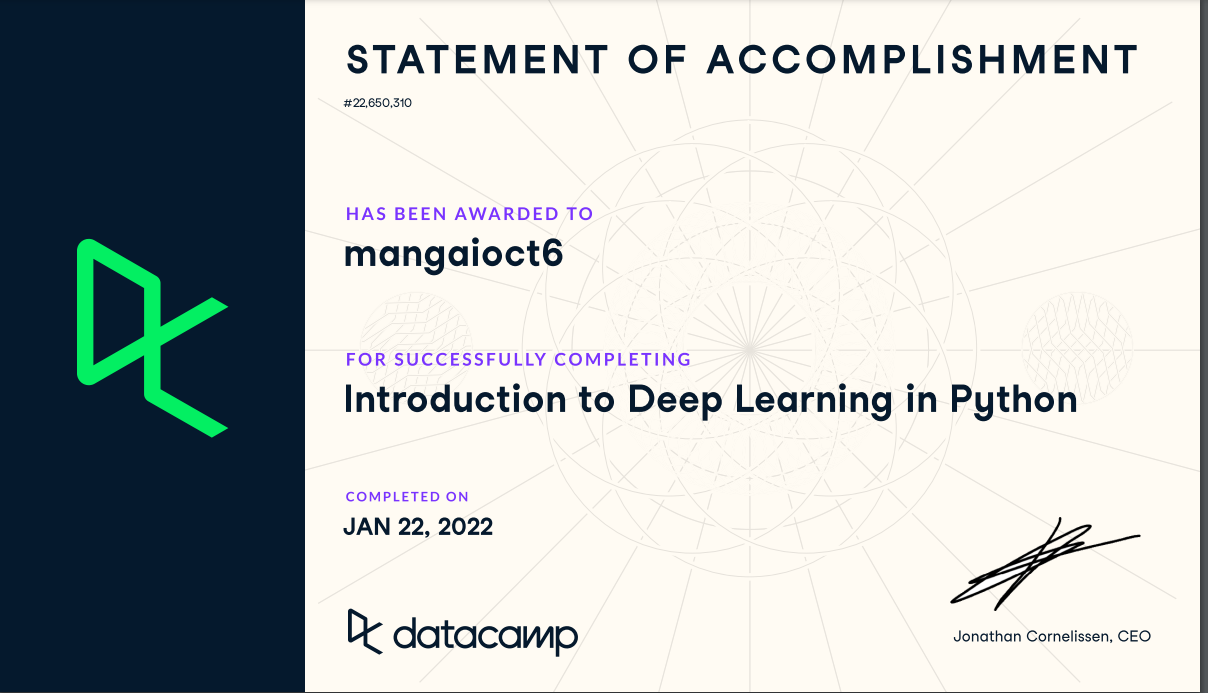